# <center>Time Series Analysis on Bid precipitation data from 1901 to 2002.</center>

## <center>Algorithm: LSTM(Long Short Term Memory) </center>

### Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Filename

In [2]:
filename = 'Bid_1901_2002.csv'

### Data
- Downloaded from http://www.indiawaterportal.org/met_data/
- State: Maharashtra
- District: BID
- Data type: Precipitation
- Data Range: Monthly mean precipitation for all the years from 1901 to 2002

### Transpose data for easy visualiztion

In [3]:
rainfall_data_matrix = pd.read_csv(filename)
bid_data = rainfall_data_matrix[rainfall_data_matrix['District'] == 'Bid']
bid_data = bid_data.drop(columns='State')
bid_data = bid_data.drop(columns='vlookup')
bid_data.head(5)

,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
27361,Bid,1901.0,16.647,1.916,27.287,33.211,59.027,212.705,168.635,154.044,69.839,84.208,0.370,0.000
27362,Bid,1902.0,0.190,0.000,1.205,13.969,1.931,48.106,84.095,62.448,305.578,79.279,75.625,27.968
27363,Bid,1903.0,1.924,0.144,0.000,3.499,68.514,77.451,225.887,185.830,229.602,97.868,1.702,7.567
27364,Bid,1904.0,0.183,0.418,11.885,0.650,4.639,63.272,101.265,38.845,394.612,68.157,0.259,0.000
27365,Bid,1905.0,0.079,2.155,0.001,16.348,4.085,101.794,65.587,93.511,126.315,32.275,0.898,0.000


In [4]:
bid_data.set_index('Year', inplace=True)
bid_data = bid_data.transpose()
bid_data.head(5)

Year,1901.0,1902.0,1903.0,1904.0,1905.0,1906.0,1907.0,1908.0,1909.0,1910.0,...,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0
District,Bid,Bid,Bid,Bid,Bid,Bid,Bid,Bid,Bid,Bid,...,Bid,Bid,Bid,Bid,Bid,Bid,Bid,Bid,Bid,Bid
Jan,16.647,0.19,1.924,0.183,0.079,21.813,0.082,0,4.79,0,...,0,6.963,9.808,0.55,11.464,0.023,0,0,4.198,6.244
Feb,1.916,0,0.144,0.418,2.155,0,4.987,0.148,1.984,0,...,2.029,3.527,0,3.714,0,2.732,10.079,1.924,0,0.401
Mar,27.287,1.205,0,11.885,0.001,0.444,0.172,12.474,15.266,2.542,...,2.393,6.373,14.761,1.877,4.698,0.941,0,0,16.581,2.25
Apr,33.211,13.969,3.499,0.65,16.348,0,71.803,1.387,4.101,0,...,2.241,30.853,10.146,7.968,28.659,0.612,1.08,1.557,5.173,29.653


In [5]:
bid_data=bid_data.drop(['District'])
bid_data.head(5)

Year,1901.0,1902.0,1903.0,1904.0,1905.0,1906.0,1907.0,1908.0,1909.0,1910.0,...,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0
Jan,16.647,0.19,1.924,0.183,0.079,21.813,0.082,0,4.79,0,...,0,6.963,9.808,0.55,11.464,0.023,0,0,4.198,6.244
Feb,1.916,0,0.144,0.418,2.155,0,4.987,0.148,1.984,0,...,2.029,3.527,0,3.714,0,2.732,10.079,1.924,0,0.401
Mar,27.287,1.205,0,11.885,0.001,0.444,0.172,12.474,15.266,2.542,...,2.393,6.373,14.761,1.877,4.698,0.941,0,0,16.581,2.25
Apr,33.211,13.969,3.499,0.65,16.348,0,71.803,1.387,4.101,0,...,2.241,30.853,10.146,7.968,28.659,0.612,1.08,1.557,5.173,29.653
May,59.027,1.931,68.514,4.639,4.085,2.604,0.22,3.817,32.342,5.849,...,2.09,16.95,33.941,3.467,5.651,7.727,58.03,21.61,5.605,13.472


### Genearete dates from 1965-01(January 1965) to 2002-12(December 2002)

In [6]:
dates = pd.date_range(start='1901-01', freq='MS', periods=len(bid_data.columns)*12)
len(dates)

1224

### Visualize the whole data

Text(0.5, 1.0, 'Month vs Precipitation across all years')

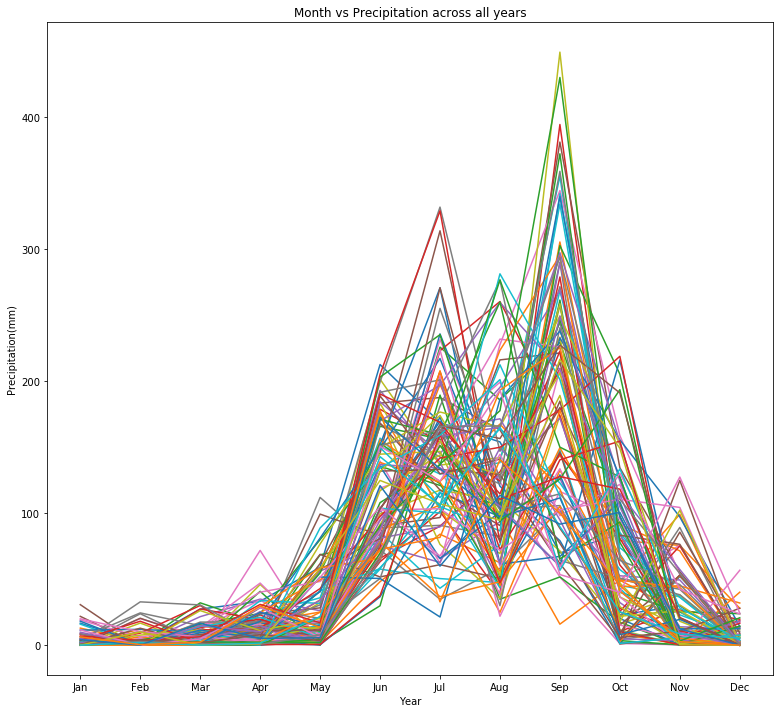

In [7]:
plt.figure(figsize=(13,12))
plt.plot(bid_data)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

### Box plot

Text(0.5, 1.0, 'Month vs Precipitation across all years')

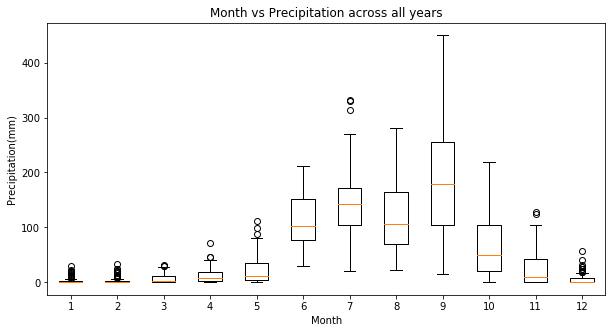

In [8]:
plt.figure(figsize=(10,5))
plt.boxplot(bid_data)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

### Insights from the plot
- The rainfall in the months December, January, February, March and April is very less.
- The rainfall in the months June, July and August are high and in September it is maximum compared to rainfall in other months of the year. 
- We can observe the seasonality effect.

In [9]:
bid_data_np = bid_data.transpose().as_matrix()
shape = bid_data_np.shape
bid_data_np = bid_data_np.reshape((shape[0] * shape[1], 1))

### Split the whole data into train(1901 - 1995) and test data(1995 - 2002)

In [10]:
bid_data = pd.DataFrame({'Precipitation': bid_data_np[:,0]})
bid_data.set_index(dates, inplace=True)

test_bid_data = bid_data.ix['1901': '2002']
print(len(test_bid_data))
bid_data = bid_data.ix[: '1994']
len(bid_data)

1224


1128

### Visualize data

Text(0.5, 1.0, 'Precipitation in mm')

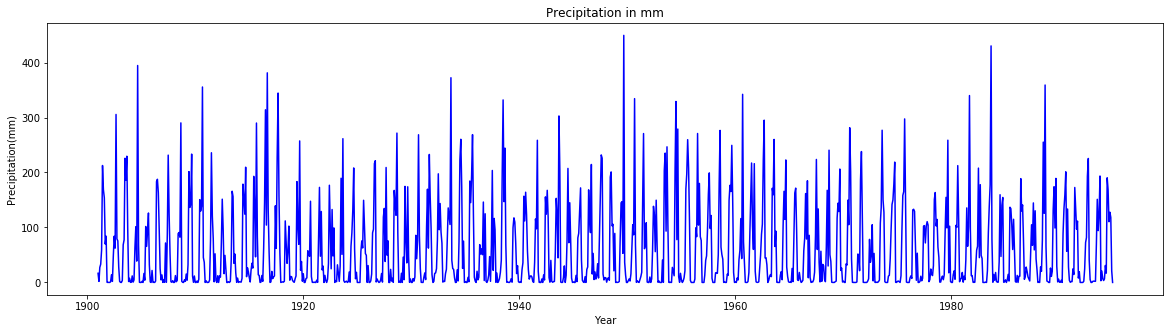

In [11]:
plt.figure(figsize=(20,5))
plt.plot(bid_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')

### Visualize data(zoomed version) - 10 years(1901 00- 1910)

Text(0.5, 1.0, 'Precipitation in mm')

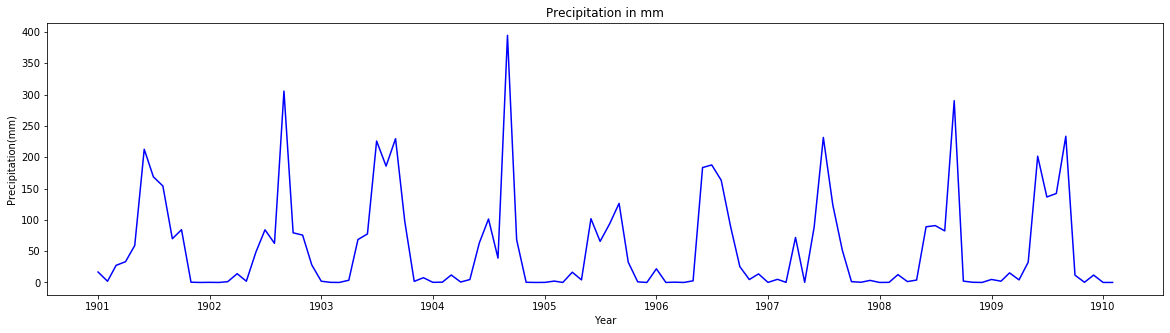

In [12]:
plt.figure(figsize=(20,5))
plt.plot(bid_data.ix[:110], color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')

### LSTM

### Scale the data - (0 to 1)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_data = scaler.fit_transform(bid_data)
test_data = scaler.fit_transform(test_bid_data)

In [14]:
bid_data

,Precipitation
1901-01-01,16.647
1901-02-01,1.916
1901-03-01,27.287
1901-04-01,33.211
1901-05-01,59.027
1901-06-01,212.705
1901-07-01,168.635
1901-08-01,154.044
1901-09-01,69.839
1901-10-01,84.208


In [15]:
train_data[:5]

array([[0.03703704],
       [0.00426281],
       [0.06070941],
       [0.07388941],
       [0.13132608]])

In [16]:
scaler.inverse_transform(train_data[:5])

array([[16.647],
       [ 1.916],
       [27.287],
       [33.211],
       [59.027]])

In [17]:
print("Shape of train data: " + str(train_data.shape))
print("Shape of test data: " + str(test_data.shape))

Shape of train data: (1128, 1)
Shape of test data: (1224, 1)


### Create dataset
- Convert time series data into input and labels.

In [18]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    
    return np.array(dataX), np.array(dataY)

In [19]:
look_back = 12
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [20]:
testY

array([0.00042272, 0.        , 0.00268094, ..., 0.2225248 , 0.10095691,
       0.00586692])

In [21]:
print("Shape of train input: " + str(trainX.shape))
print("Shape of train labels: " + str(trainY.shape))
print("Shape of test input: " + str(testX.shape))
print("Shape of test labels: " + str(testY.shape))

Shape of train input: (1115, 12)
Shape of train labels: (1115,)
Shape of test input: (1211, 12)
Shape of test labels: (1211,)


### Reshape data

In [22]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
print("Shape of train input: " + str(trainX.shape))
print("Shape of train labels: " + str(trainY.shape))
print("Shape of test input: " + str(testX.shape))
print("Shape of test labels: " + str(testY.shape))

Shape of train input: (1115, 1, 12)
Shape of train labels: (1115,)
Shape of test input: (1211, 1, 12)
Shape of test labels: (1211,)


### Create model using Keras

In [24]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


### Display the model

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot



In [26]:
def plot_keras_model(model, show_shapes=True, show_layer_names=True):
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names).create(prog='dot',format='svg'))



### Train model using train data

In [27]:
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 2s - loss: 0.0201
Epoch 2/200
 - 1s - loss: 0.0148
Epoch 3/200
 - 2s - loss: 0.0142
Epoch 4/200
 - 2s - loss: 0.0138
Epoch 5/200
 - 1s - loss: 0.0136
Epoch 6/200
 - 1s - loss: 0.0134
Epoch 7/200
 - 1s - loss: 0.0134
Epoch 8/200
 - 1s - loss: 0.0132
Epoch 9/200
 - 1s - loss: 0.0131
Epoch 10/200
 - 1s - loss: 0.0129
Epoch 11/200
 - 1s - loss: 0.0130
Epoch 12/200
 - 1s - loss: 0.0130
Epoch 13/200
 - 1s - loss: 0.0130
Epoch 14/200
 - 1s - loss: 0.0130
Epoch 15/200
 - 1s - loss: 0.0128
Epoch 16/200
 - 1s - loss: 0.0129
Epoch 17/200
 - 1s - loss: 0.0129
Epoch 18/200
 - 1s - loss: 0.0129
Epoch 19/200
 - 1s - loss: 0.0129
Epoch 20/200
 - 1s - loss: 0.0128
Epoch 21/200
 - 1s - loss: 0.0128
Epoch 22/200
 - 1s - loss: 0.0128
Epoch 23/200
 - 1s - loss: 0.0127
Epoch 24/200
 - 1s - loss: 0.0127
Epoch 25/200
 - 1s - loss: 0.0126
Epoch 26/200
 - 1s - loss: 0.0127
Epoch 27/200
 - 1s - loss: 0.0126
Epoch 28/200
 - 1s - loss: 0.0126
Epoch 29/

### Predict values using the trained model

In [28]:
trainPredict = model.predict(trainX)
# testPredictInTrain = model.predict(trainX[-look_back:, :, :])
testPredict = model.predict(testX)

In [29]:
testY.shape

(1211,)

### Inverse transform the data

In [30]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
# testPredictInTrain = scaler.inverse_transform(testPredictInTrain)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

### Calculate RMSE for train and test predictions

In [31]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 46.82 RMSE
Test Score: 46.52 RMSE


### Generate Dates for index

In [32]:
dates = pd.date_range(start='1965-04', freq='MS', periods=trainY.shape[1])

### Create Dataframes for actual values and predicted values of train data

In [33]:
trainActual = pd.DataFrame({'Precipitation': trainY[0]})
trainActual.index = dates

trainPredictdf = pd.DataFrame({'Precipitation': trainPredict[:,0]})
trainPredictdf.index = dates

### Plot the predicted values
- Actual values - blue
- Predicted values - red

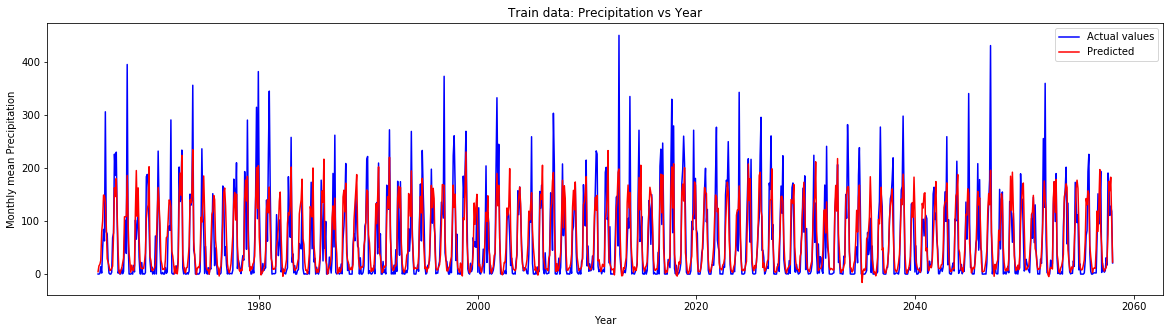

In [34]:
plt.figure(figsize=(20,5))
plt.plot(trainActual, color='blue', label='Actual values')
plt.plot(trainPredictdf, color='red', label='Predicted')
plt.title('Train data: Precipitation vs Year')
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation')
plt.legend(loc='best')

### Generate Dates for index

In [35]:
testDates = pd.date_range(start=test_bid_data.index[0]+12, freq='MS', periods=test_bid_data.shape[0]-12-1)

### Create Dataframes for actual values and predicted values of test data

In [36]:
# testActual = pd.DataFrame({'Precipitation': testPredictInTrain[:,0] + testY[0]})
testActual = pd.DataFrame({'Precipitation': testY[0]})
testActual.index = testDates

testPredictdf = pd.DataFrame({'Precipitation': testPredict[:,0]})
testPredictdf.index = testDates

### Plot the forecasted values

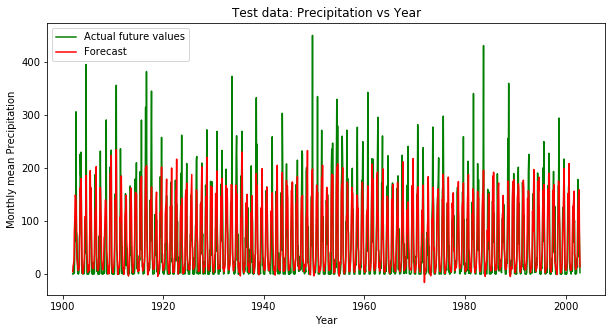

In [37]:
plt.figure(figsize=(10,5))
plt.plot(testActual, color='green', label='Actual future values')
plt.plot(testPredictdf, color='red', label='Forecast')
plt.title('Test data: Precipitation vs Year')
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation')
plt.legend(loc='best')

In [38]:
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Train_RMSE = [126.23, 117.23, 104.45, 96.37, 93.37, 90.76, 89.29, 85.00, 83.40, 81.89, 82.50, 74.52]
Test_RMSE = [145.11, 140.89, 127.52, 121.96, 116.52, 113.09, 106.36, 107.95, 106.25, 108.13, 102.26, 91.59]

Text(0.5, 1.0, 'RMSE of Train and Test data at different look backs')

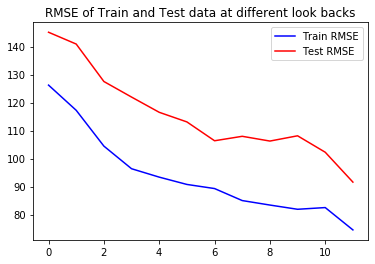

In [39]:
plt.plot(Train_RMSE, color='blue', label='Train RMSE')
plt.plot(Test_RMSE, color='red', label='Test RMSE')
plt.legend(loc='best')
plt.title('RMSE of Train and Test data at different look backs')